In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# Import joblib to save the model
import joblib
from sklearn.metrics import silhouette_score

In [ ]:
# Data inspection and data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Receipt No.         4285 non-null   object 
 1   Completion Time     4285 non-null   object 
 2   Details             2730 non-null   object 
 3   Transaction Status  4285 non-null   object 
 4   Paid In             1115 non-null   float64
 5   Withdrawn           3170 non-null   float64
 6   Balance             4285 non-null   float64
dtypes: float64(3), object(4)
memory usage: 234.5+ KB


In [ ]:
# Load the dataset
df = pd.read_csv('mpesa_copy.csv')
# Prints the first few rows of the dataset
df.head()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,TF30B8KY98,2025-06-03 09:06:00.029,NaN,Completed,NaN,-32.0,0.0
1,TF30B8KY98,2025-06-03 09:06:00.029,of Credit Party,Completed,32.0,NaN,32.0
2,TF38B8E5WI,2025-06-03 09:04:00.019,NaN,Completed,NaN,-65.0,0.0
3,TF38B8E5WI,2025-06-03 09:04:00.019,of Credit Party,Completed,65.0,NaN,65.0
4,TF31APDWQP,2025-06-03 06:00:00.000,NaN,Completed,NaN,-35.0,0.0


In [11]:
# Create a copy of the original DataFrame to avoid modifying the CSV
df_clean = df.copy()

In [7]:
# Check for missing values
print("Missing values in each column:")
print(df_clean.isnull().sum())

Missing values in each column:
Receipt No.              0
Completion Time          0
Details               1555
Transaction Status       0
Paid In               3170
Withdrawn             1115
Balance                  0
dtype: int64


In [63]:
print(df.columns.tolist())

['Receipt No.', 'Completion Time', 'Details', 'Transaction Status', 'Paid In', 'Withdrawn', 'Balance']


In [13]:
df_clean.isnull()

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,False,False,True,False,True,False,False
1,False,False,False,False,False,True,False
2,False,False,True,False,True,False,False
3,False,False,False,False,False,True,False
4,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...
4280,False,False,False,False,False,True,False
4281,False,False,False,False,True,False,False
4282,False,False,False,False,False,True,False
4283,False,False,False,False,True,False,False


In [21]:
#Returns number of rows and columns 
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")


Number of Rows: 4285
Number of Columns: 7


In [23]:
# Replace missing values in 'Paid In' and 'Withdrawn' columns with 0 in the cleaned dataset
df_clean['Paid In'] = df_clean['Paid In'].fillna(0)
df_clean['Withdrawn'] = df_clean['Withdrawn'].fillna(0)

In [25]:
# Replace missing values in the 'Details' column with 'Other'
df_clean['Details'] = df_clean['Details'].fillna('Other')

In [26]:
# Check for missing values after cleaning
print("Missing values in each column:")
print(df_clean.isnull().sum())

Missing values in each column:
Receipt No.           0
Completion Time       0
Details               0
Transaction Status    0
Paid In               0
Withdrawn             0
Balance               0
dtype: int64


In [64]:
# Show five samples of Paid in and withdrawn columns
print(df_clean[['Paid In', 'Withdrawn', 'Type']].head(5))

# Count how many of each
print(df_clean['Type'].value_counts())


   Paid In  Withdrawn  Type
0      0.0      -32.0     1
2      0.0      -65.0     1
4      0.0      -35.0     1
6      0.0      -35.0     1
8      0.0       -7.0     1
Type
1    3170
Name: count, dtype: int64


In [28]:
#Returns number of rows and columns after cleaning
print(f"Number of Rows: {df_clean.shape[0]}")
print(f"Number of Columns: {df_clean.shape[1]}")


Number of Rows: 4285
Number of Columns: 7


In [29]:
#Confirms no missing values in the 'Details' column
print(df_clean['Details'].isna().sum()) 

0


In [31]:
df_clean.tail(10)

,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance,Type
4275,SF61L935CV,2024-06-06 11:44:59.971,Airtime Purchase,Completed,0.0,-35.0,226.76,1
4276,SF60KRQMG4,2024-06-06 09:18:59.962,Airtime Purchase,Completed,0.0,-35.0,261.76,1
4277,SF55JPM5YP,2024-06-05 20:44:59.971,Airtime Purchase,Completed,0.0,-38.0,296.76,1
4278,SF52JA4RFC,2024-06-05 19:25:59.981,Airtime Purchase,Completed,0.0,-35.0,334.76,1
4279,SF53HBHBAH,2024-06-05 11:15:00.000,Merchant Payment to 350626 - Java Lavington,Completed,0.0,-240.0,369.76,1
4280,SF50HBD432,2024-06-05 11:14:00.038,Business Payment from 303031 - Absa Bank Kenya...,Completed,300.0,0.0,609.76,0
4281,SF40F3K20K,2024-06-04 18:06:00.029,Merchant Payment to 350626 - Java Lavington,Completed,0.0,-860.0,309.76,1
4282,SF40F3F34U,2024-06-04 00:00:00.000,Business Payment from 303031 - Absa Bank Kenya...,Completed,900.0,0.0,1169.76,0
4283,SF49DBSJMB,2024-06-04 00:00:00.000,Customer Transfer of Funds Charge,Completed,0.0,-7.0,269.76,1
4284,SF49DBSJMB,2024-06-04 00:00:00.000,Customer Transfer to - 07******072 ANNE MUSAU,Completed,0.0,-150.0,276.76,1


In [65]:
#prints the the no of times each label (e.g.,"Rent Payment", "Other") was applied.
category_counts = df_clean['Category'].value_counts()
print(category_counts)
 

Category
Airtime                  1535
Other                    1127
Transaction Charges       172
People Transfer            87
Withdrawals                84
Shopping and Food          78
PayBill Transactions       42
Loan repayments            37
Power                       7
Educational resources       1
Name: count, dtype: int64


In [ ]:
#Feature Engineering

In [ ]:
# If 'Withdrawn' is 0.0, it's 'Paid in' (0); else it's 'Withdraw' (1)
df_clean['Type'] = df_clean['Withdrawn'].apply(lambda x: 0 if x == 0.0 else 1)

In [86]:
# Define a function to categorize transaction details
def categorize_details(details):
    details = str(details).lower().strip()
   
    if any(word in details for word in ["kplc"]):
        return "Power"
 
    elif any(word in details for word in ["0100002481388"]):
        return "Rent payment"
    elif any(word in details for word in ["tingg", "prestige"]):
        return "Educational resources"
    elif any(word in details for word in ["empire", "0723774017"]):
        return "Entertainment"
    elif any(word in details for word in ["withdrawal", "customer withdrawal"]):
        return "Withdrawals"
    elif any(word in details for word in ["charge", "withdrawal charge", "pay bill charge", "funds charge"]):
        return "Transaction Charges"
    elif any(word in details for word in ["pizza", "misty", "qaffee", "house of leather", "seroma", "sleek", "miniso", "naivas", "cafeteria", "quick mart", "carrefour", "supermarket", "KFC", "sleeklady", "restaurant", "butchery", "mrp", "java", "emirates", "chicken", "beauty", "aboosto", "7802055", "cafe", "engorika", "big square", "7020202", "merchant payment"]):
        return "Shopping and Food"
    elif any(word in details for word in ["OD Loan Repayment", "timiza viaabsa", "loan repayment", "KCB m-pesa deposit", "pay bill online fuliza"]):
        return "Loan repayments"
    elif any(word in details for word in ["customer transfer", "customer send", "customer payment"]):
        return "People Transfer"
    elif any(word in details for word in ["airtime", "purchase", "Recharge", "zuku","airtime purchase","purchase with fuliza", "airtime purchase with fuliza", "cards"]):
        return "Airtime"
    elif any(word in details for word in ["pay bill", "paybill", "OSCL", "Pay Bill", "Tithe"]):
        return "PayBill Transactions"
    else:
        return "Other"

In [ ]:
 # Apply the categorization function to the 'Details' column
df_clean['Category'] = df_clean['Details'].apply(categorize_details)

In [34]:
# Drop rows where Type is 0 (Paid In) and keep only Withdrawn transactions (Type == 1)
df_clean = df_clean[df_clean['Type'] == 1]


In [ ]:
# Extract the hour from the 'Time' column
df_clean['Hour'] = pd.to_datetime(df_clean['Completion Time']).dt.hour

# Extract the day of the week from the 'Time' column
df_clean['DayOfWeek'] = pd.to_datetime(df_clean['Completion Time']).dt.day_name()

# Extract the month from the 'Time' column
df_clean['Month'] = pd.to_datetime(df_clean['Completion Time']).dt.month



In [36]:
# Calculate the net movement (amount)
df_clean['Amount'] = df_clean['Paid In'] - df_clean['Withdrawn']

C:\Users\User\AppData\Local\Temp\ipykernel_15888\4007139269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Amount'] = df_clean['Paid In'] - df_clean['Withdrawn']


In [37]:
# One-hot encode the 'Category' column
category_dummies = pd.get_dummies(df_clean['Category'], prefix='Category')

In [38]:
# Convert the one-hot encoded columns to integers and rename them with a prefix
category_dummies = category_dummies.astype(int).add_prefix('Converted_')

In [39]:
# Concatenate the one-hot encoded columns with the original DataFrame
df_clean = pd.concat([df_clean,  category_dummies], axis=1)

In [40]:
# One-hot encode the 'DayOfWeek' column
dayofweek_dummies = pd.get_dummies(df_clean['DayOfWeek'], prefix='DayOfWeek')
dayofweek_dummies = dayofweek_dummies.astype(int).add_prefix('Converted_')

In [41]:
# Concatenate the one-hot encoded columns with the original DataFrame
df_clean = pd.concat([df_clean,  dayofweek_dummies], axis=1)

In [42]:
# One-hot encode the 'Hour' column
hour_dummies = pd.get_dummies(df_clean['Hour'], prefix='Hour')
hour_dummies = hour_dummies.astype(int).add_prefix('Converted_')

In [ ]:
# Concatenate the one-hot encoded columns with the original DataFrame
df_clean = pd.concat([df_clean,  hour_dummies], axis=1)

In [ ]:
# One-hot encode the 'Month' column
month_dummies = pd.get_dummies(df_clean['Month'], prefix='Month')
month_dummies = month_dummies.astype(int).add_prefix('Converted_')

In [ ]:
# Concatenate the one-hot encoded columns with the original DataFrame
df_clean = pd.concat([df_clean,  month_dummies], axis=1)

In [ ]:
# Get the list of one-hot encoded columns
encoded_columns = [col for col in df_clean.columns if col.startswith('Converted_')]

In [ ]:
# Combine the features into a single DataFrame for clustering, including the Amount column
clustering_data = pd.concat([df_clean[encoded_columns], df_clean[['Amount']]], axis=1)

In [ ]:
# Scale the 'amount' column
scaler = StandardScaler()
clustering_data['amount'] = scaler.fit_transform(clustering_data[['Amount']])

In [ ]:
# Determine the optimal number of clusters using the silhouette method
silhouette_scores = []
cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data)
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]


In [ ]:
# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=100)
df_clean['purpose_cluster'] = kmeans.fit_predict(clustering_data)

In [ ]:
# Check The Silhouette Score for the clustering

from sklearn.metrics import silhouette_score

X_scaled = clustering_data.values  # Use the scaled data for silhouette score calculation
labels = kmeans.predict(X_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')

c:\Users\User\Desktop\PHOENIX\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Silhouette Score: 0.9796621555424498


In [ ]:
# Calculate average amount, median amount, total amount, and top categories for each cluster
cluster_summary = df_clean.groupby('purpose_cluster').agg(
    avg_amount=('Amount', 'mean'),
    median_amount=('Amount', 'median'),
    total_amount=('Amount', 'sum'),  # <-- Added total amount
    count=('purpose_cluster', 'size')
)

In [ ]:
# Add top 2 for each type of Converted_ column per cluster

def get_top_n_columns(cluster_data, prefix, n=2):
    cols = [col for col in cluster_data.columns if col.startswith(prefix)]
    counts = cluster_data[cols].sum().sort_values(ascending=False)
    unique_top = []
    for col in counts.index:
        name = col.replace('Converted_', '')
        if name not in unique_top:
            unique_top.append(name)
        if len(unique_top) == n:
            break
    return ", ".join(unique_top)

top_categories = []
top_months = []
top_hours = []
top_days = []

for cluster in df_clean['purpose_cluster'].unique():
    cluster_data = df_clean[df_clean['purpose_cluster'] == cluster]
    top_categories.append(get_top_n_columns(cluster_data, 'Converted_Category'))
    top_months.append(get_top_n_columns(cluster_data, 'Converted_Month'))
    top_hours.append(get_top_n_columns(cluster_data, 'Converted_Hour'))
    top_days.append(get_top_n_columns(cluster_data, 'Converted_DayOfWeek'))

cluster_summary['top_categories'] = top_categories
cluster_summary['top_months'] = top_months
cluster_summary['top_hours'] = top_hours
cluster_summary['top_days'] = top_days



In [ ]:
# Remove 'Category_Other' from the top_categories column in the summary (so it doesn't show in the output)
cluster_summary['top_categories'] = cluster_summary['top_categories'].apply(
    lambda x: ", ".join([cat for cat in x.split(", ") if cat != "Category_Other"])
)


In [ ]:
# Display the cluster summary
print(cluster_summary)

                   avg_amount  median_amount  total_amount  count  \
purpose_cluster                                                     
0                  256.416057           35.0     806941.33   3147   
1                27622.739130        25363.0     635323.00     23   

                                top_categories          top_months  \
purpose_cluster                                                      
0                             Category_Airtime  Month_10, Month_11   
1                Category_PayBill Transactions    Month_1, Month_8   

                        top_hours                              top_days  
purpose_cluster                                                          
0                Hour_14, Hour_13  DayOfWeek_Friday, DayOfWeek_Saturday  
1                 Hour_13, Hour_0   DayOfWeek_Monday, DayOfWeek_Tuesday  


C:\Users\User\AppData\Local\Temp\ipykernel_15888\4251387189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amount_by_hour.index, y=amount_by_hour.values, palette='viridis')


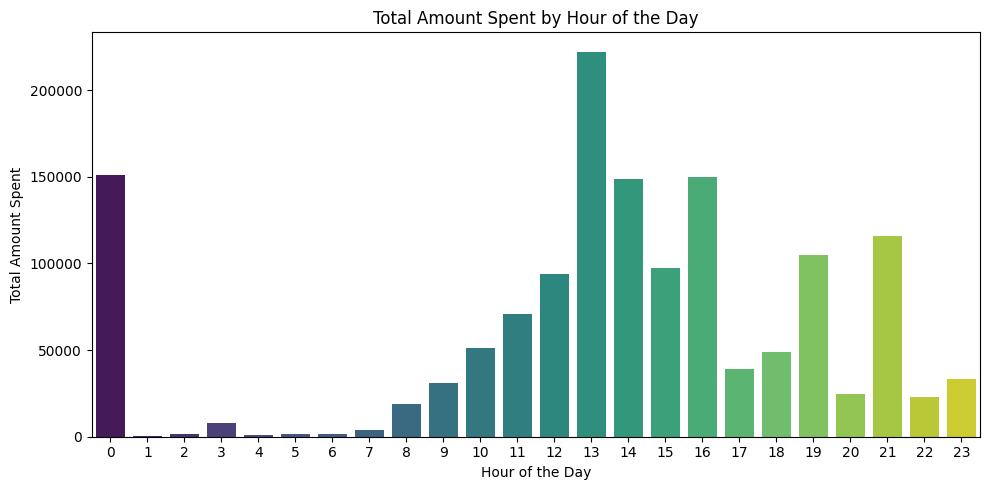

In [ ]:
# Data visualizations
# Bar chart of Hour of the Day vs Total Amount Spent
amount_by_hour = df_clean.groupby('Hour')['Amount'].sum().reindex(range(24))
plt.figure(figsize=(10, 5))
sns.barplot(x=amount_by_hour.index, y=amount_by_hour.values, palette='viridis')
plt.title('Total Amount Spent by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Amount Spent')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15888\4051017117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amount_by_day.index, y=amount_by_day.values, palette='viridis')


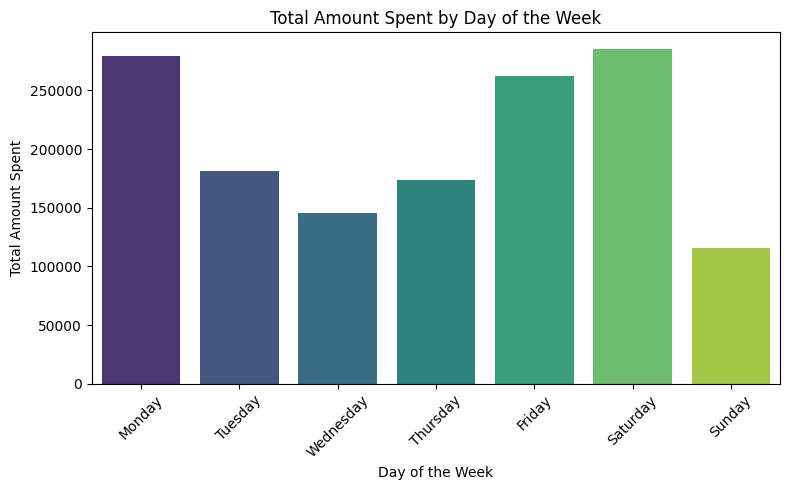

In [ ]:
# Bar chart of Day of the Week vs Total Amount Spent
amount_by_day = df_clean.groupby('DayOfWeek')['Amount'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(8, 5))
sns.barplot(x=amount_by_day.index, y=amount_by_day.values, palette='viridis')
plt.title('Total Amount Spent by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

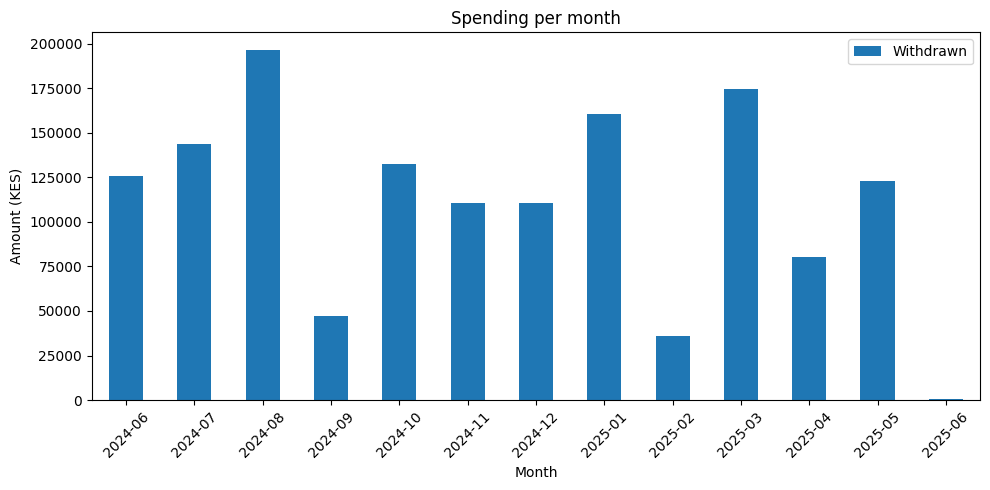

In [ ]:
# Bar chart of Month vs Total Amount Spent 
df_clean['Withdrawn'] = df_clean['Withdrawn'].abs()

monthly_summary = df_clean.groupby('Month')[['Withdrawn']].sum()

monthly_summary.plot(kind='bar', figsize=(10, 5))
plt.title('Spending per month')
plt.xlabel('Month')
plt.ylabel('Amount (KES)')
plt.xticks(rotation=45)
plt.legend(['Withdrawn'])
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_15888\79239426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amount_by_category.index, y=amount_by_category.values, palette='viridis')


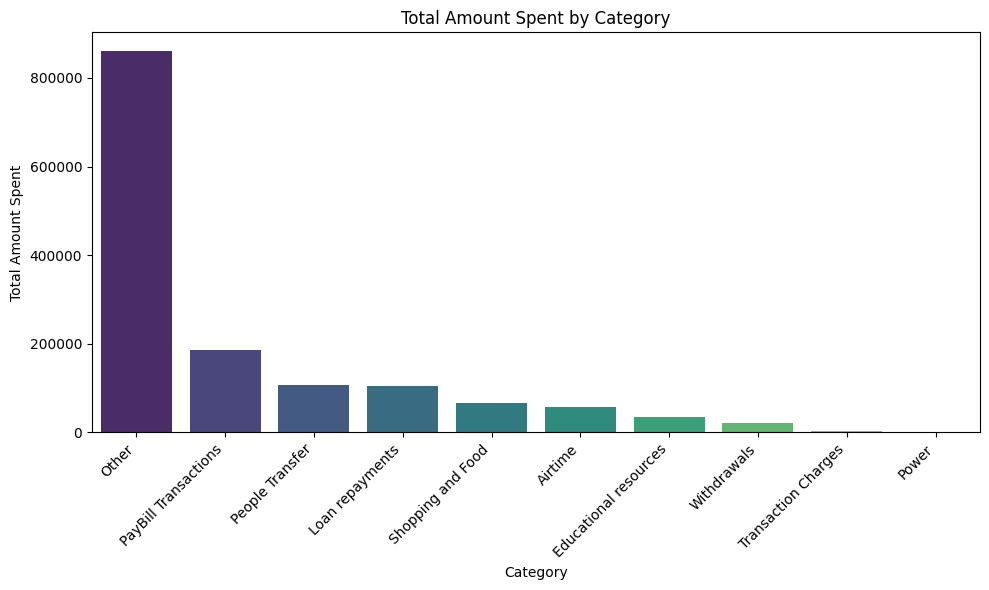

In [ ]:
# Bar chart of Category vs Total Amount Spent
amount_by_category = df_clean.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=amount_by_category.index, y=amount_by_category.values, palette='viridis')
plt.title('Total Amount Spent by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

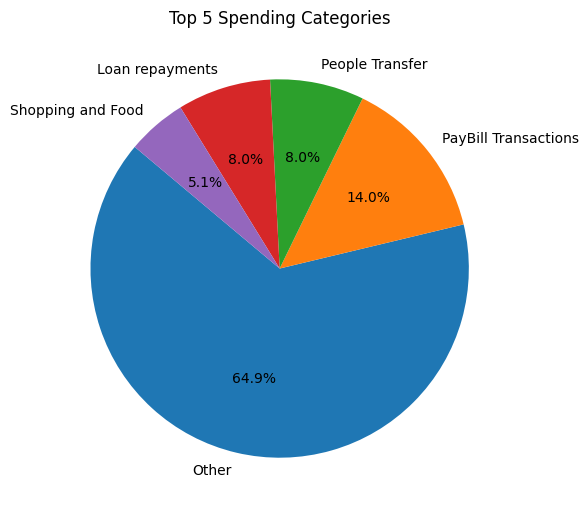

In [ ]:
# Pie chart plot of top 5 categories per the spent amount
df_clean['Amount'] = pd.to_numeric(df_clean['Amount'], errors='coerce')

plt.figure(figsize=(6, 6))
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Spending Categories')
plt.tight_layout()
plt.show()


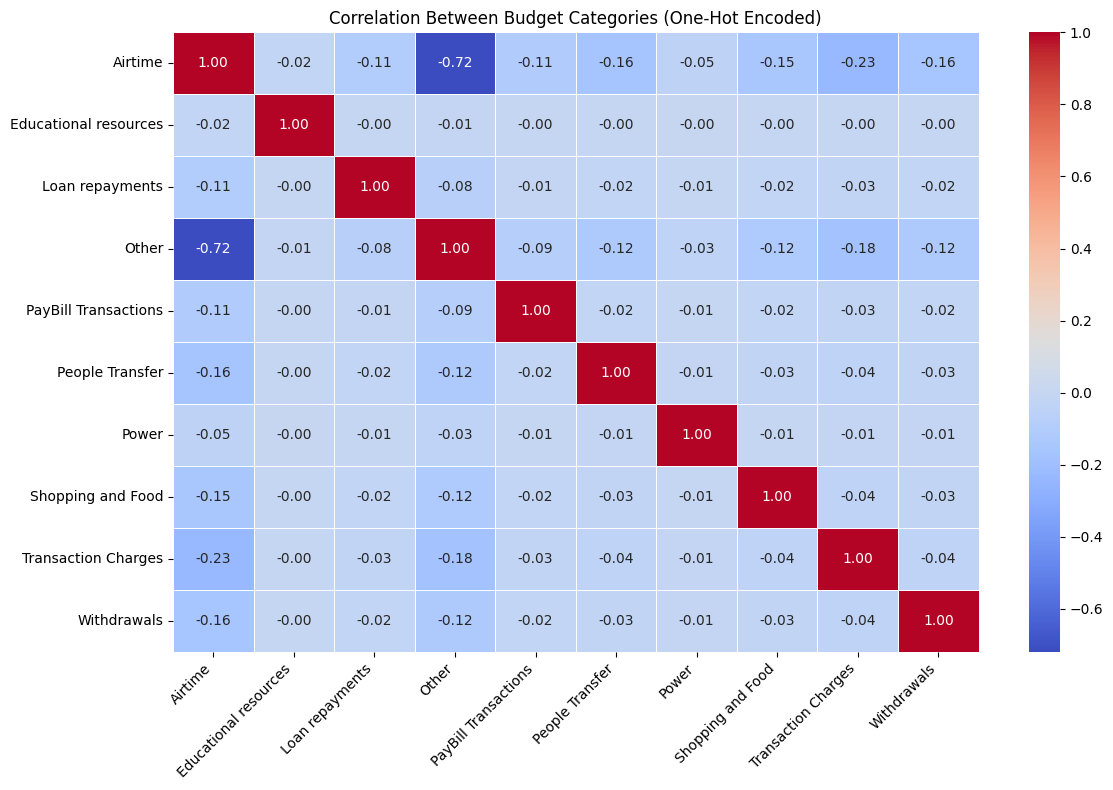

In [ ]:
# Heat map to display correlation between different categories
# Remove the "Converted_Category_" prefix for better display
category_df.columns = [col.replace('Converted_Category_', '') for col in category_cols]
correlation_matrix = category_df.corr()  # Recompute after renaming

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Budget Categories (One-Hot Encoded)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

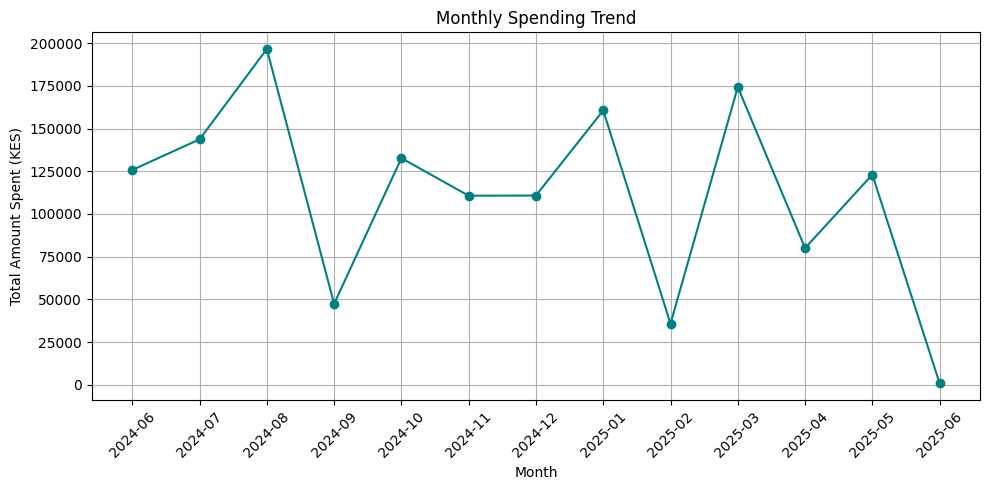

In [ ]:
# Line graph to show the trend across different months
# Group by month and sum the amounts
monthly_totals = df_clean.groupby('Month')['Amount'].sum().sort_index()

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_totals.index, monthly_totals.values, marker='o', linestyle='-', color='teal')
plt.title('Monthly Spending Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent (KES)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

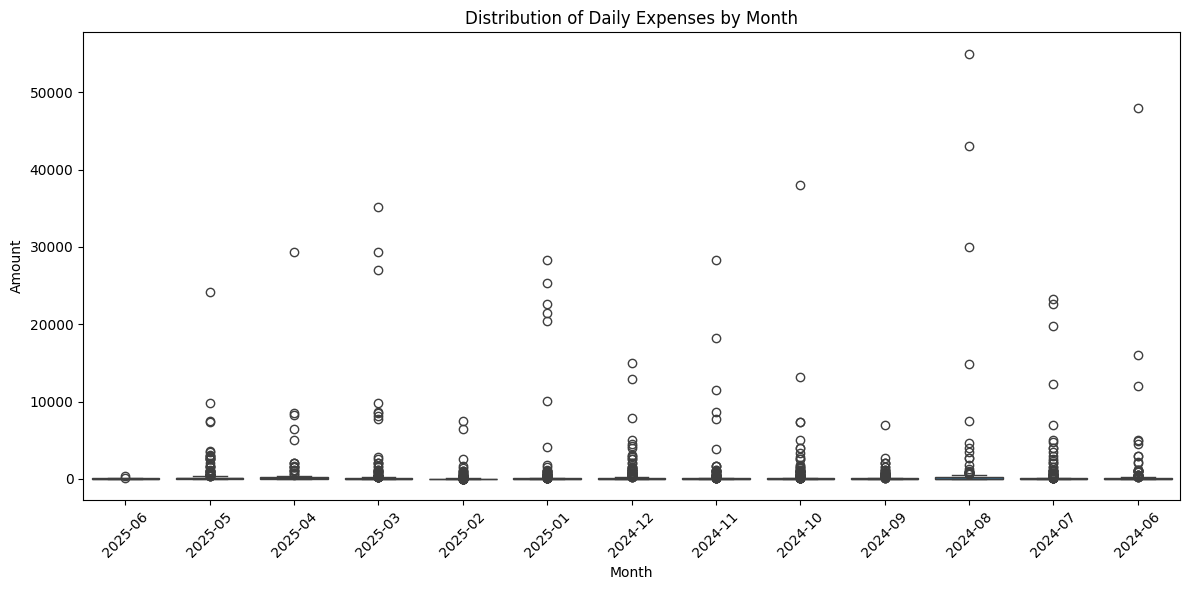

In [ ]:
# Box plot to show distribution of daily expenses by month
# Extract month
df_clean['Month'] = pd.to_datetime(df_clean['Completion Time']).dt.to_period('M').astype(str)

# Plot a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Amount', data=df_clean)
plt.title('Distribution of Daily Expenses by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

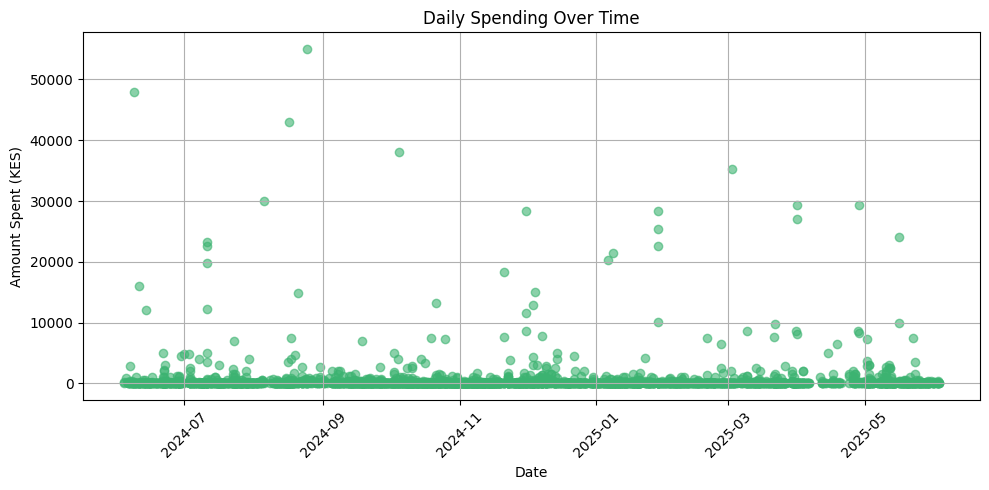

In [ ]:
# Scatter plot of the daily spending over months
plt.figure(figsize=(10, 5))
plt.scatter(df_clean['Completion Time'], df_clean['Amount'], alpha=0.6, color='mediumseagreen')
plt.title('Daily Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Amount Spent (KES)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

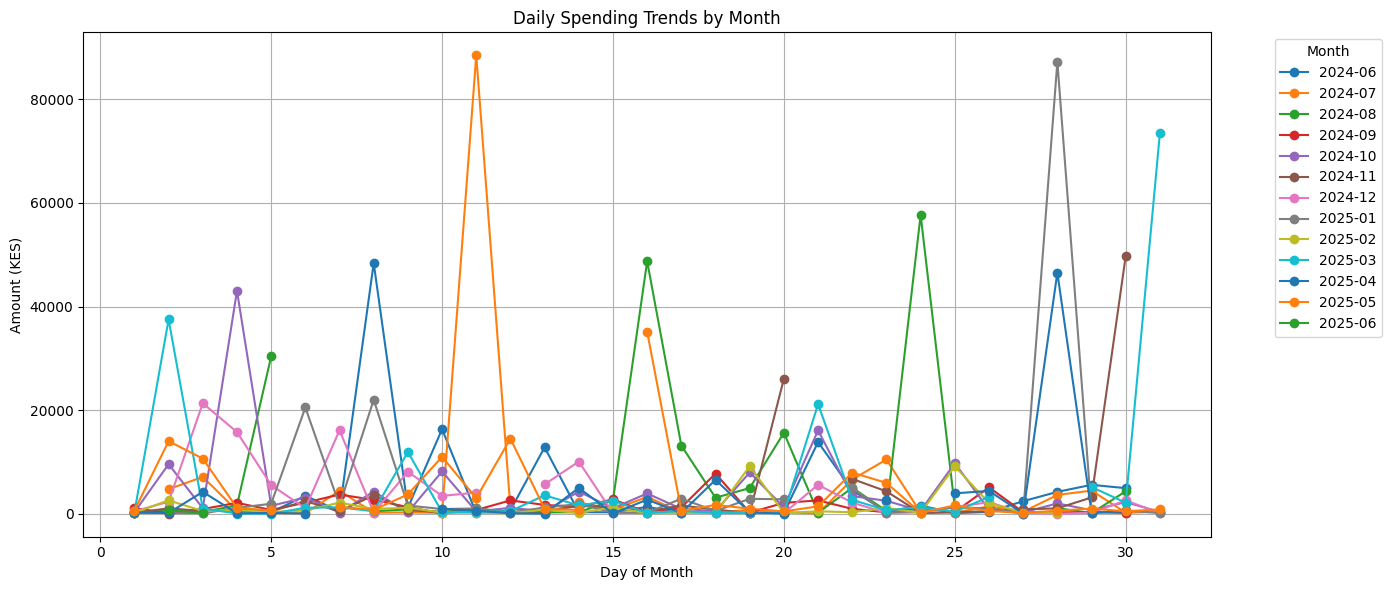

In [ ]:
# Pivot plot chart to display daily spending trends by month
# Extract day and month 
df_clean['Day'] = pd.to_datetime(df_clean['Completion Time']).dt.day 
df_clean['Month'] = pd.to_datetime(df_clean['Completion Time']).dt.to_period('M').astype(str)

# Group
daily_trends = df_clean.groupby(['Month', 'Day'])['Amount'].sum().reset_index()

# Pivot to get Month-wise columns
pivot = daily_trends.pivot(index = 'Day', columns='Month', values='Amount')
                           
# Plot
pivot.plot(figsize=(14, 6), marker='o')
plt.title('Daily Spending Trends by Month')
plt.xlabel('Day of Month')
plt.ylabel('Amount (KES)')
plt.grid(True)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()